## Waste Management using CNN Model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install tqdm


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm #progress display
import warnings
warnings.filterwarnings('ignore')

In [8]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [9]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [10]:
# visualization
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [03:25<00:00, 48.56it/s]


In [11]:
pip install cvtColor


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cvtColor (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for cvtColor


In [12]:
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)


In [13]:
data.shape

(22564, 2)

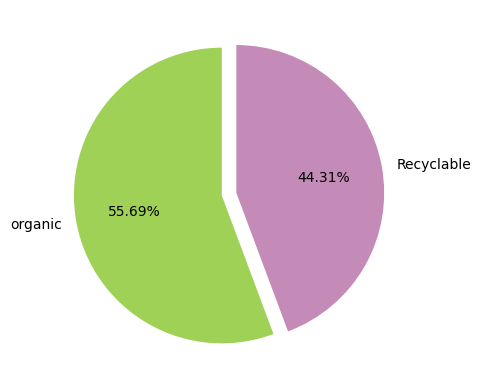

In [14]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['organic', 'Recyclable'], autopct='%0.2f%%', colors=colors,
       startangle=90, explode=[0.05,0.05])
plt.show()

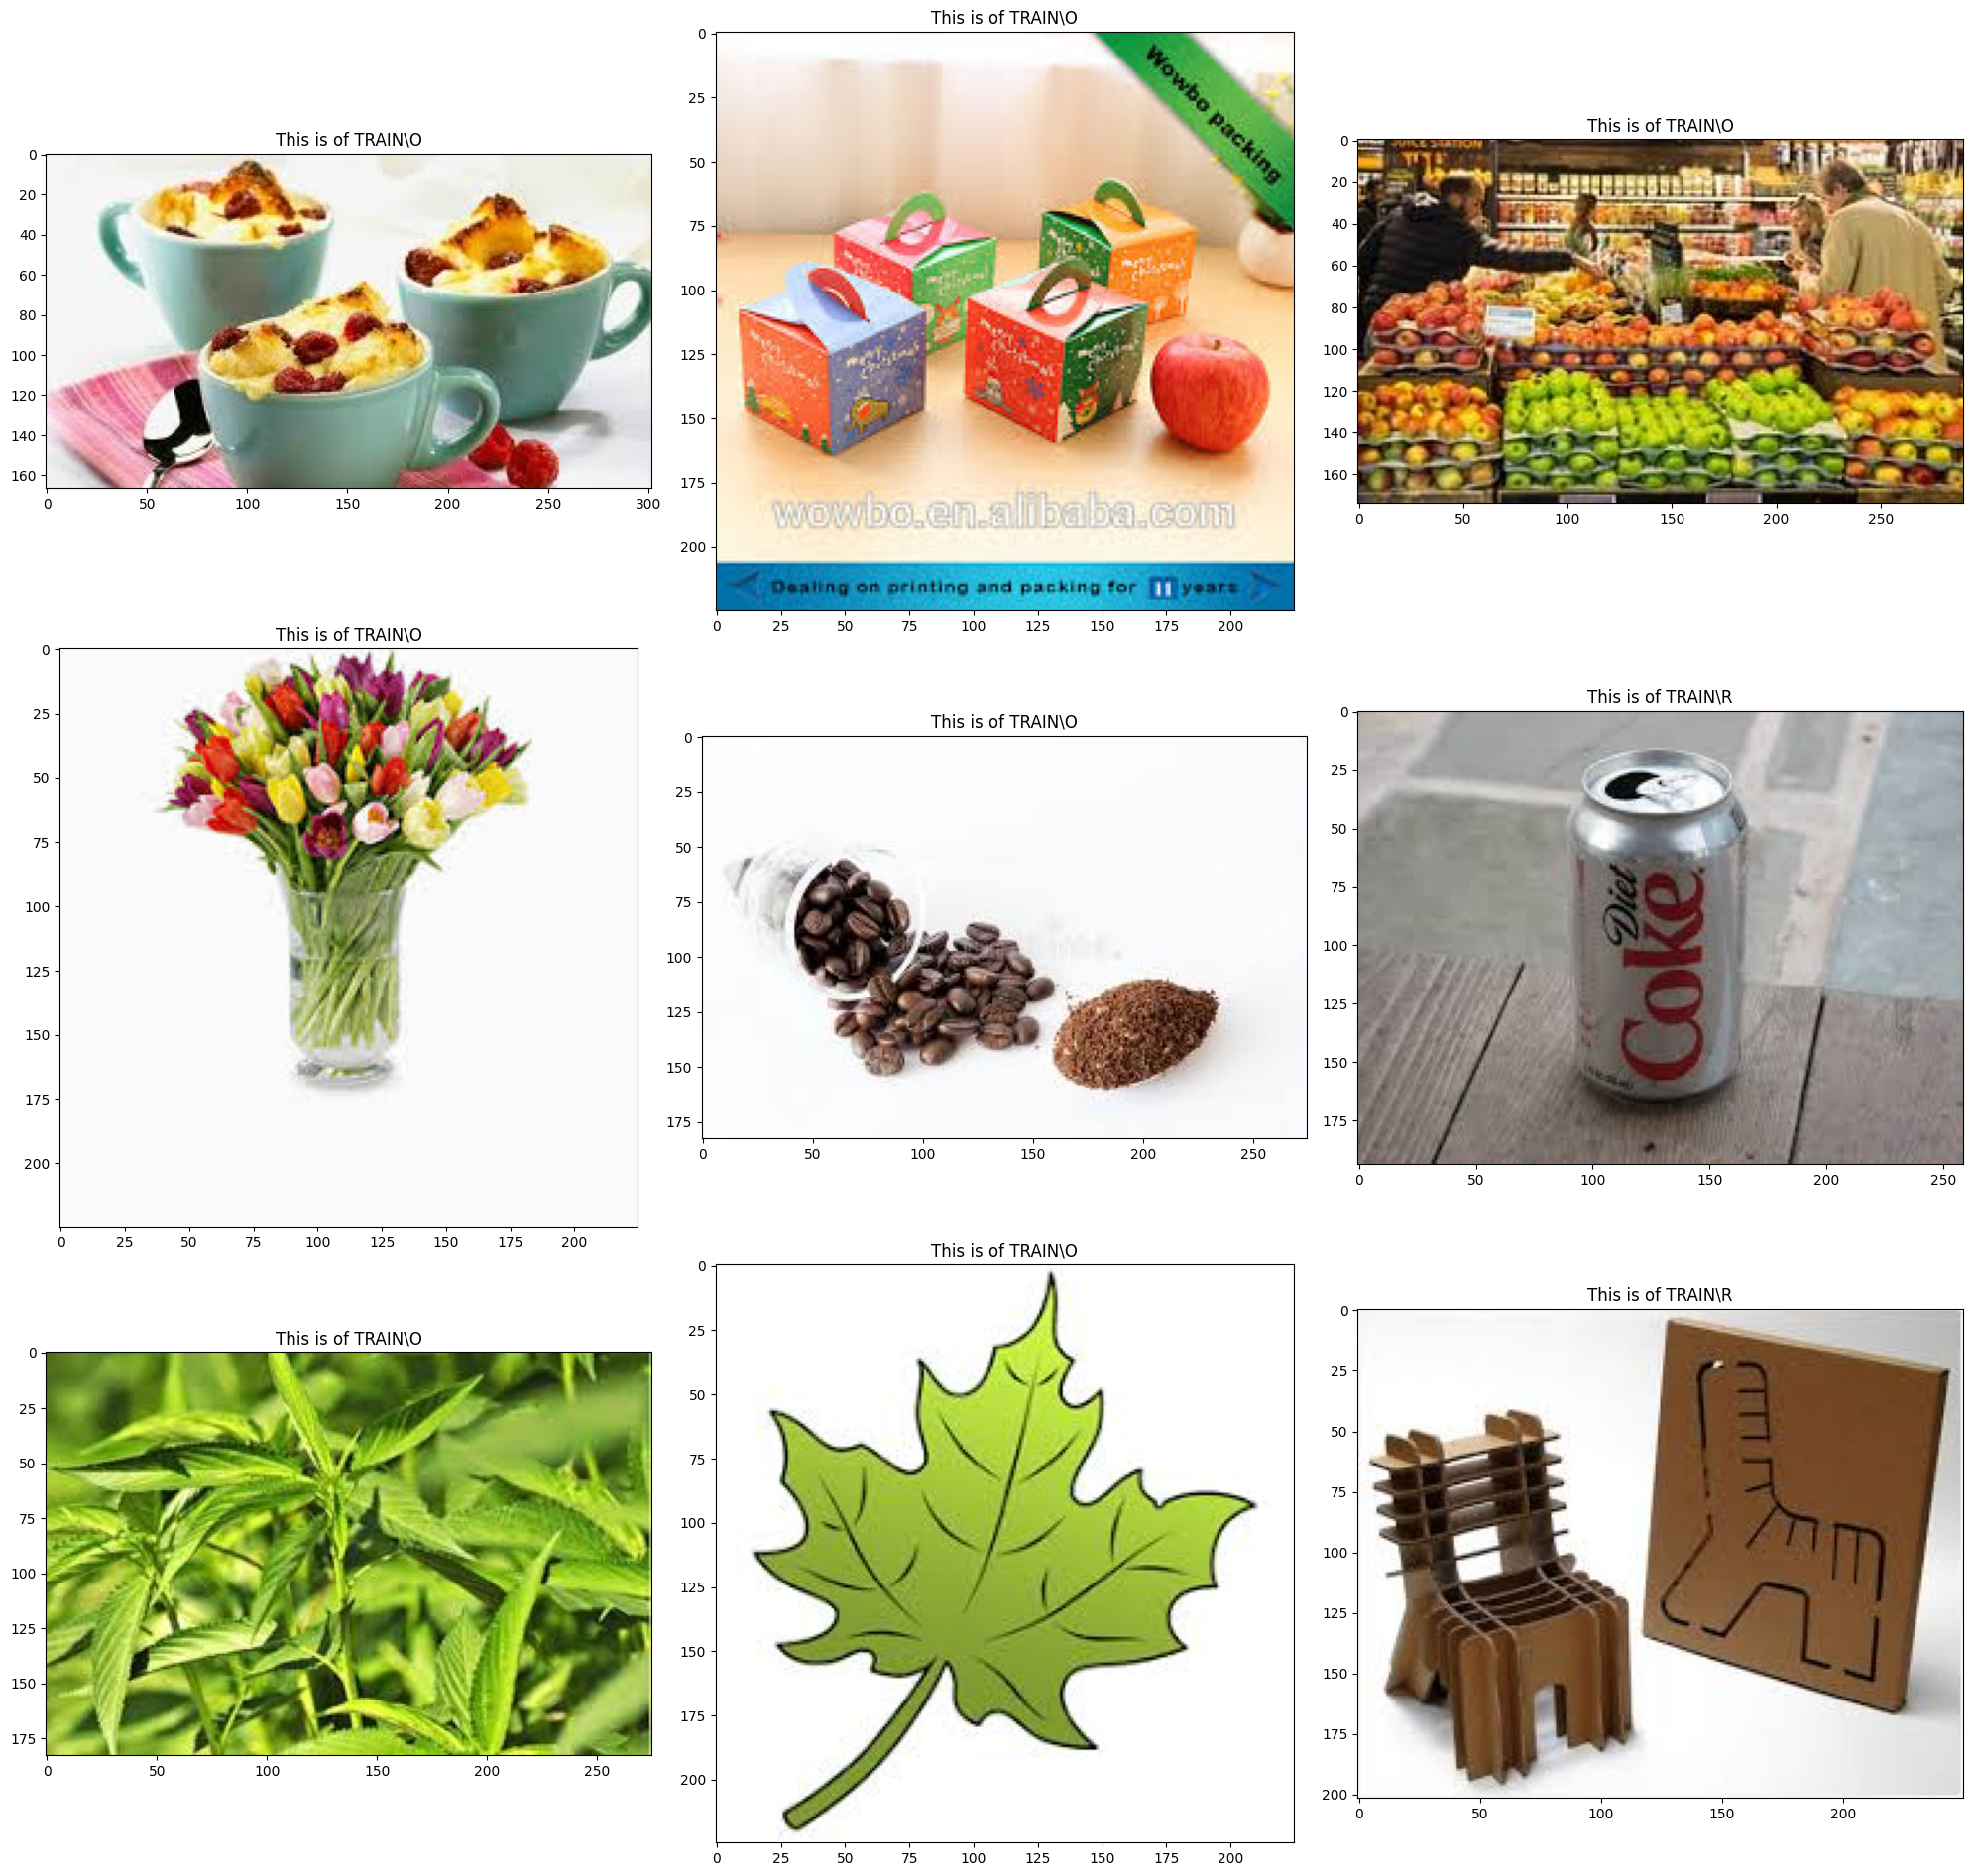

In [18]:
plt.figure(figsize=(20, 25))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolutional Neural Network

In [19]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 32

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [24]:
hist = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=test_generator
)

Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 867s 1s/step - accuracy: 0.7733 - loss: 0.5193 - val_accuracy: 0.8750 - val_loss: 0.3254
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 693s 982ms/step - accuracy: 0.8439 - loss: 0.3864 - val_accuracy: 0.8727 - val_loss: 0.3257
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 661s 937ms/step - accuracy: 0.8650 - loss: 0.3375 - val_accuracy: 0.8747 - val_loss: 0.3125
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 791s 1s/step - accuracy: 0.8757 - loss: 0.3130 - val_accuracy: 0.8910 - val_loss: 0.2838
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 719s 1s/step - accuracy: 0.8950 - loss: 0.2655 - val_accuracy: 0.8762 - val_loss: 0.3014
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 777s 1s/step - accuracy: 0.9175 - loss: 0.2236 - val_accuracy: 0.8814 - val_loss: 0.3680
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 1872s 3s/step - accuracy: 0.9389 - loss: 0.1664 - val_accuracy: 0.8782 - val_loss: 0.3933
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 685s 971ms/step - accuracy: 0.9587 - loss: 0.1187 